# AI Bauchi 6 Weeks Computer Vision Bootcamp

<div style="display: flex; justify-content: space-evenly; align-items: center; width: 100%;">
<img src="../../logos\aib.png" width='100px'/>
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQeyMRtudTwUIhRHGT1VKvVbnRYTu8VaQtaHg&s" width='100px'/>
<img src="https://miro.medium.com/v2/resize:fit:800/0*qa3Uh-1JZUhCuBVK.png" width='100px'/>
</div>

---

## Session 14: Object Detection

**Instructor**: [Handan Nathaniel](https://www.linkedin.com/in/nathanielhandan/)
**Date**: 14th August, 2024

---

## Object Detection

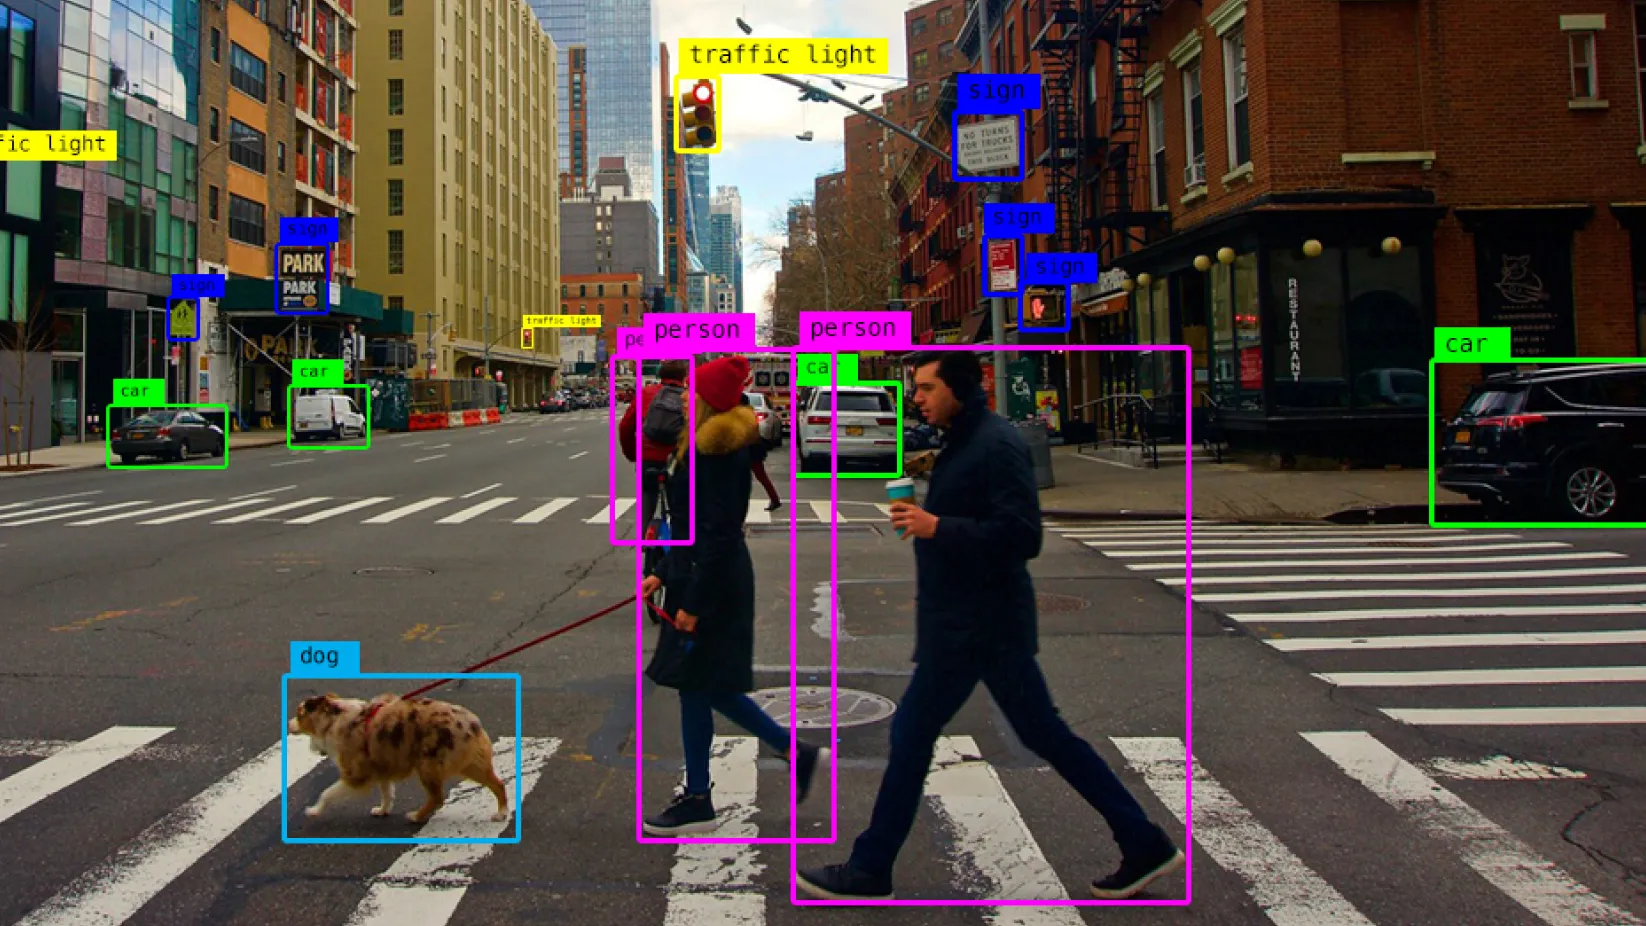

**Definition**:
Object detection is a computer technology related to computer vision and image processing that deals with detecting instances of semantic objects of a certain class (such as humans, buildings, or cars) in digital images and videos. Well-researched domains of object detection include face detection and pedestrian detection. Object detection has applications in many areas of computer vision, including image retrieval and video surveillance.

### Key Concepts

**1. Introduction to Object Detection**

- **What is Object Detection?** Object detection is a computer technology related to computer vision and image processing that deals with detecting instances of semantic objects of a certain class (such as humans, buildings, or cars) in digital images and videos. Well-researched domains of object detection include face detection and pedestrian detection. Object detection has applications in many areas of computer vision, including image retrieval and video surveillance.

- **Importance of Object Detection** Object detection is a computer technology related to computer vision and image processing that deals with detecting instances of semantic objects of a certain class (such as humans, buildings, or cars) in digital images and videos. Well-researched domains of object detection include face detection and pedestrian detection. Object detection has applications in many areas of computer vision, including image retrieval and video surveillance.

- **Object Detection vs Image Classification** Object detection is a computer technology related to computer vision and image processing that deals with detecting instances of semantic objects of a certain class (such as humans, buildings, or cars) in digital images and videos. Well-researched domains of object detection include face detection and pedestrian detection. Object detection has applications in many areas of computer vision, including image retrieval and video surveillance.

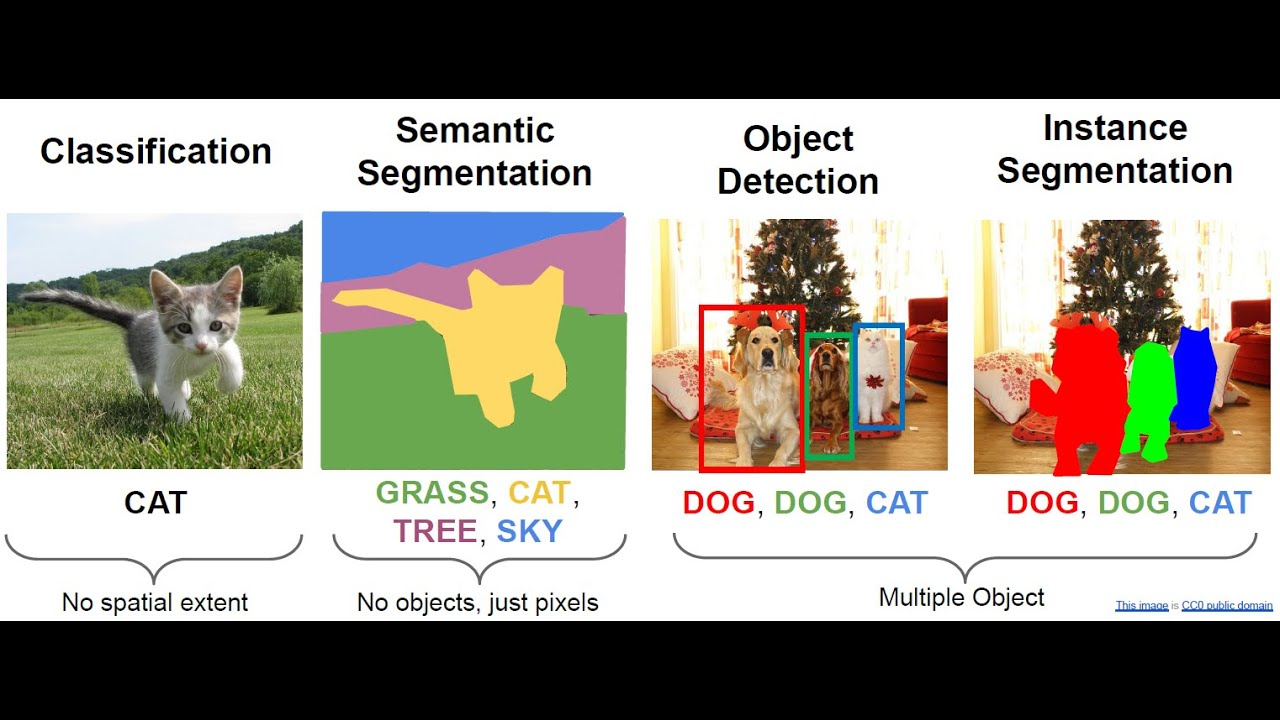
    

2. **Applications of Object Detection**

- **Autonomous Vehicles:** Detecting objects on the road such as pedestrians, vehicles, and traffic signs.
- **Surveillance:** Detecting objects in a video feed to identify potential threats or suspicious activities.
- **Medical Imaging:** Detecting tumors or other abnormalities in medical images.
- **Retail:** Detecting objects on store shelves to monitor inventory levels.

3. **Object Detection Techniques**
   - **Sliding Window Approach:**
     - An early method where a window slides across the image at different scales to detect objects.
     - Computationally expensive and less efficient, especially for larger images.
   - **Region Proposal-Based Methods:**
     - **R-CNN (Regions with Convolutional Neural Networks):**
       - Extracts region proposals and uses CNNs to classify objects within each region.
       - Accurate but slow due to the two-stage process of generating proposals and then classifying them.
     - **Fast R-CNN:** Improves on R-CNN by sharing convolutional layers across region proposals.
     - **Faster R-CNN:** Introduces a Region Proposal Network (RPN) that speeds up the process by generating proposals directly from the convolutional feature map.

4. **Single-Shot Detectors (SSD) and YOLO**
   - **SSD (Single Shot Multibox Detector):**
     - Processes the entire image in one go and predicts both bounding boxes and class scores for each object.
     - Faster than R-CNN methods but may trade off some accuracy for speed.
   - **YOLO (You Only Look Once):**
     - Divides the image into a grid and predicts bounding boxes and probabilities for each grid cell.
     - Known for its real-time speed and efficiency, making it suitable for applications where speed is critical.
     - Various versions (YOLOv2, YOLOv3, YOLOv4, YOLOv5) have been developed, each improving on speed and accuracy.

5. **Implementing Object Detection**
   - **Pre-trained Models:**
     - **COCO Dataset:** Many object detection models are pre-trained on the COCO (Common Objects in Context) dataset, which contains a wide variety of objects in different contexts.
     - **Using TensorFlow/Keras or PyTorch:** Both frameworks provide implementations of popular object detection models (like YOLO, Faster R-CNN) that can be fine-tuned or used as-is.
   - **Practical Example:**




In [2]:
import cv2
import numpy as np

# Load YOLO model
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

# Load the image
img = cv2.imread("image.jpg")
height, width, channels = img.shape

# Preprocess the image for YOLO
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

# Process the detection results
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# Draw the bounding boxes
for i in range(len(boxes)):
    x, y, w, h = boxes[i]
    label = str(classes[class_ids[i]])
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(img, label, (x, y + 30), cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 2)

# Display the image
cv2.imshow("Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\dnn\src\darknet\darknet_importer.cpp:210: error: (-212:Parsing error) Failed to open NetParameter file: yolov3.cfg in function 'cv::dnn::dnn4_v20240521::readNetFromDarknet'




6. **Challenges in Object Detection**
   - **Occlusion:** Objects partially hidden behind other objects may be difficult to detect.
   - **Scale Variations:** Objects appearing at different scales and sizes within an image pose challenges.
   - **Complex Backgrounds:** Distinguishing objects from complex or cluttered backgrounds can be difficult.
   - **Real-time Performance:** Balancing accuracy with the need for real-time processing, especially in applications like autonomous driving.

7. **Evaluation Metrics**
   - **Intersection over Union (IoU):** Measures the overlap between the predicted bounding box and the ground truth box.
   - **Precision and Recall:** Used to evaluate the accuracy of the detection model in identifying true positives versus false positives.
   - **Mean Average Precision (mAP):** A commonly used metric that combines precision and recall across all classes and IoU thresholds.

#### Practical Assignment
- **Task:** Implement object detection on a given set of images using a pre-trained YOLO model. 
- **Steps:**
  1. Load and preprocess the images.
  2. Apply object detection using YOLO.
  3. Evaluate the performance of the model using mAP and IoU.
  4. Submit the detected objects in a structured format (e.g., JSON or CSV).

#### Conclusion
Object detection is a powerful tool in computer vision, enabling machines to not only recognize objects but also understand their spatial relationships within an image. By learning various detection algorithms and their practical implementations, you will gain the skills needed to build sophisticated computer vision applications that require object detection capabilities.